#  1.Choose a binary classification dataset

In [17]:
import pandas as pd

# Load your dataset
df = pd.read_csv("data.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

# Features (X) and Target (y)
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


Shape: (569, 33)
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     120

#   2.Train/test split and standardize features

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set shape: (455, 30)
Testing set shape: (114, 30)


#  3.Fit a Logistic Regression model.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"])

# Encode target (M=1, B=0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

#  4.Evaluate with confusion matrix, precision, reca l, ROC-AUC

Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.975
Recall: 0.9285714285714286
ROC-AUC: 0.996031746031746


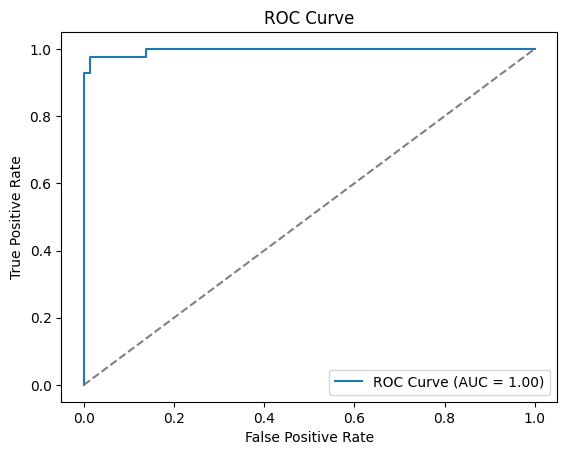

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision and Recall
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


#  5.Tune threshold and explain sigmoid function

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Example: tune threshold
threshold = 0.4   # default is 0.5
y_pred_tuned = (y_prob >= threshold).astype(int)

# Evaluation with tuned threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))


Confusion Matrix:
 [[71  1]
 [ 2 40]]
Precision: 0.975609756097561
Recall: 0.9523809523809523


## The sigmoid function converts any real-valued number into a value between 0 and 1:

𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
σ(z)=
1+e
−z
1
	​


In logistic regression, 
𝑧
=
𝑤
𝑇
𝑥
+
𝑏
z=w
T
x+b (a linear combination of features).

The sigmoid output is interpreted as a probability that the class is 1 (e.g., malignant).

By default, we classify as 1 if probability ≥ 0.5, otherwise 0.

But you can tune the threshold (e.g., 0.3, 0.7) to balance precision vs recall.